In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np

In [2]:
team_stats = pd.read_csv('projectData/teamstats.csv')
team_stats.head(10)

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
0,10,100,0,1,0,0,0,0,5,0,0,0,0
1,10,200,1,0,1,1,1,1,10,3,1,3,1
2,11,100,1,0,0,0,0,0,2,0,0,0,0
3,11,200,0,1,1,0,1,0,10,3,0,2,0
4,12,100,1,0,0,0,0,0,1,0,0,0,0
5,12,200,0,1,1,0,1,0,11,3,0,2,0
6,13,100,1,1,0,0,1,1,6,0,0,2,1
7,13,200,0,0,1,1,0,0,9,2,1,2,0
8,14,100,1,0,0,0,0,1,5,0,0,0,1
9,14,200,0,1,1,1,1,0,7,1,1,3,0


In [3]:
team_bans = pd.read_csv('projectData/teambans.csv')
team_bans.head(10)

,matchid,teamid,championid,banturn
0,10,100,11,1
1,10,100,117,3
2,10,100,120,5
3,10,200,84,2
4,10,200,201,4
5,10,200,105,6
6,11,100,117,1
7,11,100,53,3
8,11,100,114,5
9,11,200,79,2


In [4]:
champ_df = pd.read_csv("projectData/champs.csv").sort_values('id')
champ_df.head(10)

,name,id
40,Annie,1
99,Olaf,2
33,Galio,3
100,Twisted Fate,4
52,Xin Zhao,5
31,Urgot,6
7,LeBlanc,7
91,Vladimir,8
32,Fiddlesticks,9
22,Kayle,10


In [5]:
team_bans = team_bans.merge(champ_df,left_on='championid',right_on='id',how='left')
team_bans.head(10)

,matchid,teamid,championid,banturn,name,id
0,10,100,11,1,Master Yi,11
1,10,100,117,3,Lulu,117
2,10,100,120,5,Hecarim,120
3,10,200,84,2,Akali,84
4,10,200,201,4,Braum,201
5,10,200,105,6,Fizz,105
6,11,100,117,1,Lulu,117
7,11,100,53,3,Blitzcrank,53
8,11,100,114,5,Fiora,114
9,11,200,79,2,Gragas,79


In [6]:
team_bans = team_bans.drop('id',axis=1)
team_bans.head(10)

,matchid,teamid,championid,banturn,name
0,10,100,11,1,Master Yi
1,10,100,117,3,Lulu
2,10,100,120,5,Hecarim
3,10,200,84,2,Akali
4,10,200,201,4,Braum
5,10,200,105,6,Fizz
6,11,100,117,1,Lulu
7,11,100,53,3,Blitzcrank
8,11,100,114,5,Fiora
9,11,200,79,2,Gragas


In [7]:
team_bans.dtypes

matchid        int64
teamid         int64
championid     int64
banturn        int64
name          object
dtype: object

In [8]:
team_bans_champion_name = team_bans.groupby('name').count()
team_bans_champion_name.head(10)

,matchid,teamid,championid,banturn
name,,,,
Aatrox,2208,2208,2208,2208
Ahri,20806,20806,20806,20806
Akali,5168,5168,5168,5168
Alistar,733,733,733,733
Amumu,5109,5109,5109,5109
Anivia,1310,1310,1310,1310
Annie,4098,4098,4098,4098
Ashe,467,467,467,467
Aurelion Sol,697,697,697,697


In [9]:
team_bans_champion_name.columns

Index(['matchid', 'teamid', 'championid', 'banturn'], dtype='object')

In [10]:
team_bans_champion_name['Count'] = team_bans_champion_name['matchid']
team_bans_champion_name = team_bans_champion_name.drop(['matchid', 'teamid', 'championid', 'banturn'],axis=1)
team_bans_champion_name.head(10)

,Count
name,
Aatrox,2208
Ahri,20806
Akali,5168
Alistar,733
Amumu,5109
Anivia,1310
Annie,4098
Ashe,467
Aurelion Sol,697


In [11]:
team_bans_champion_name.shape

(136, 1)

Text(0.5,1,'Top 20 Champions with Highest Number of Bans')

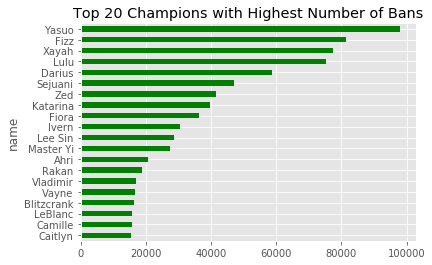

In [12]:
team_bans_champion_name['Count'].sort_values(ascending=True).tail(20).plot.barh(color='green')
plt.title('Top 20 Champions with Highest Number of Bans')

In [19]:
team_bans_turn_first = team_bans[(team_bans['banturn'] == 1)]
team_bans_turn_first = team_bans_turn_first.groupby('name').count()
team_bans_turn_first['Count'] = team_bans_turn_first['matchid']
team_bans_turn_first = team_bans_turn_first.drop(['matchid', 'teamid', 'championid', 'banturn'],axis=1)
team_bans_turn_first = team_bans_turn_first.sort_values('Count',ascending=False)

In [20]:
# calculate and graph top 20 champions got 2nd banned
team_bans_turn_second = team_bans[(team_bans['banturn'] == 2)]
team_bans_turn_second = team_bans_turn_second.groupby('name').count()
team_bans_turn_second['Count'] = team_bans_turn_second['matchid']
team_bans_turn_second = team_bans_turn_second.drop(['matchid', 'teamid', 'championid', 'banturn'],axis=1)
team_bans_turn_second = team_bans_turn_second.sort_values('Count',ascending=False)

In [21]:
# calculate and graph top 20 champions got 3rd banned
team_bans_turn_third = team_bans[(team_bans['banturn'] == 3)]
team_bans_turn_third = team_bans_turn_third.groupby('name').count()
team_bans_turn_third['Count'] = team_bans_turn_third['matchid']
team_bans_turn_third = team_bans_turn_third.drop(['matchid', 'teamid', 'championid', 'banturn'],axis=1)
team_bans_turn_third = team_bans_turn_third.sort_values('Count',ascending=False)

In [22]:
# calculate and graph top 20 champions got 4th banned
team_bans_turn_forth = team_bans[(team_bans['banturn'] == 4)]
team_bans_turn_forth = team_bans_turn_forth.groupby('name').count()
team_bans_turn_forth['Count'] = team_bans_turn_forth['matchid']
team_bans_turn_forth = team_bans_turn_forth.drop(['matchid', 'teamid', 'championid', 'banturn'],axis=1)
team_bans_turn_forth = team_bans_turn_forth.sort_values('Count',ascending=False)

In [17]:
# calculate and graph top 20 champions got 5th banned
team_bans_turn_fifth = team_bans[(team_bans['banturn'] == 5)]
team_bans_turn_fifth = team_bans_turn_fifth.groupby('name').count()
team_bans_turn_fifth['Count'] = team_bans_turn_fifth['matchid']
team_bans_turn_fifth = team_bans_turn_fifth.drop(['matchid', 'teamid', 'championid', 'banturn'],axis=1)
team_bans_turn_fifth = team_bans_turn_fifth.sort_values('Count',ascending=False)

In [24]:
# calculate and graph top 20 champions got 6th banned
team_bans_turn_sixth = team_bans[(team_bans['banturn'] == 6)]
team_bans_turn_sixth = team_bans_turn_sixth.groupby('name').count()
team_bans_turn_sixth['Count'] = team_bans_turn_sixth['matchid']
team_bans_turn_sixth = team_bans_turn_sixth.drop(['matchid', 'teamid', 'championid', 'banturn'],axis=1)
team_bans_turn_sixth = team_bans_turn_sixth.sort_values('Count',ascending=False)

Text(0.5,1,'Top 20 Champions As Sixth Banned')

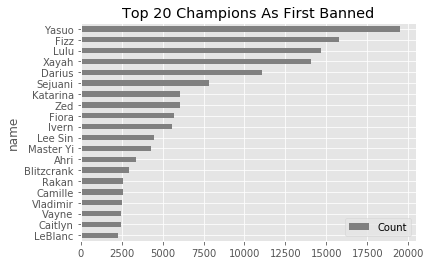

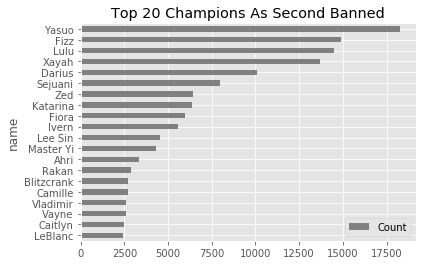

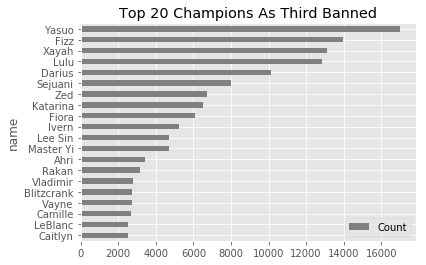

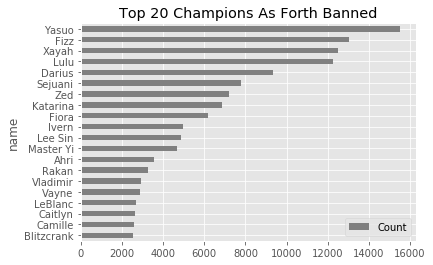

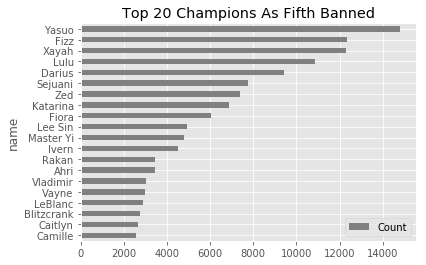

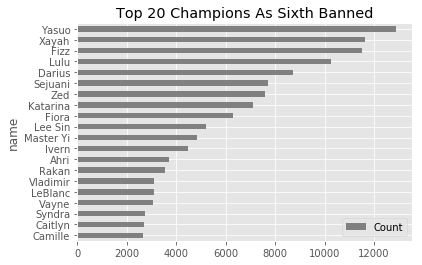

In [25]:
team_bans_turn_first.sort_values('Count',ascending=True).tail(20).plot.barh(color='gray')
plt.title('Top 20 Champions As First Banned')
team_bans_turn_second.sort_values('Count',ascending=True).tail(20).plot.barh(color='gray')
plt.title('Top 20 Champions As Second Banned')
team_bans_turn_third.sort_values('Count',ascending=True).tail(20).plot.barh(color='gray')
plt.title('Top 20 Champions As Third Banned')
team_bans_turn_forth.sort_values('Count',ascending=True).tail(20).plot.barh(color='gray')
plt.title('Top 20 Champions As Forth Banned')
team_bans_turn_fifth.sort_values('Count',ascending=True).tail(20).plot.barh(color='gray')
plt.title('Top 20 Champions As Fifth Banned')
team_bans_turn_sixth.sort_values('Count',ascending=True).tail(20).plot.barh(color='gray')
plt.title('Top 20 Champions As Sixth Banned')

Text(0.5,1,'Top 20 Champions Banned by Blue Team')

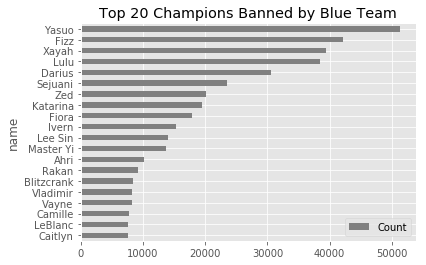

In [64]:
team_bans_team_100 = team_bans.groupby('teamid').get_group(100).groupby('name').count()
team_bans_team_100['Count'] = team_bans_team_100['matchid']
team_bans_team_100 = team_bans_team_100.drop(['matchid', 'teamid', 'championid', 'banturn'],axis=1)
team_bans_team_100 = team_bans_team_100.sort_values('Count',ascending=False)
team_bans_team_100.sort_values('Count',ascending=True).tail(20).plot.barh(color='gray')
plt.title('Top 20 Champions Banned by Blue Team')

Text(0.5,1,'Top 20 Champions Banned by Red Team')

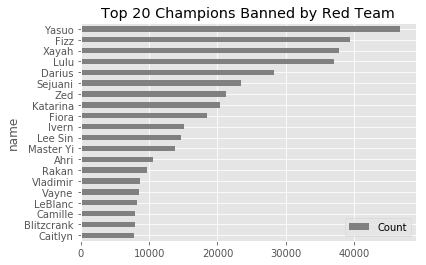

In [65]:
team_bans_team_200 = team_bans.groupby('teamid').get_group(200).groupby('name').count()
team_bans_team_200['Count'] = team_bans_team_200['matchid']
team_bans_team_200 = team_bans_team_200.drop(['matchid', 'teamid', 'championid', 'banturn'],axis=1)
team_bans_team_200 = team_bans_team_200.sort_values('Count',ascending=False)
team_bans_team_200.sort_values('Count',ascending=True).tail(20).plot.barh(color='gray')
plt.title('Top 20 Champions Banned by Red Team')

In [69]:
team_stats_total = team_stats.groupby('teamid').sum().drop(['matchid'],axis=1)
team_stats_total.columns

Index(['firstblood', 'firsttower', 'firstinhib', 'firstbaron', 'firstdragon',
       'firstharry', 'towerkills', 'inhibkills', 'baronkills', 'dragonkills',
       'harrykills'],
      dtype='object')

In [70]:
new_cols = {'firstblood': 'First Blood', 'firsttower': 'First Tower','firstinhib': 'First Inhibitor', 'firstbaron': 'First Baron',
            'firstdragon':'First Dragon', 'firstharry': 'First Rift Herald', 'towerkills': 'Total Tower Kills',
            'inhibkills':'Total Inhibitor Destroyed', 'baronkills': 'Total Baron Kills', 'dragonkills': 'Total Dragon Kills',
            'harrykills': 'Total Rift Herald Kills'}
team_stats_total.rename(columns=new_cols, inplace=True)
team_stats_total.head(10)

,First Blood,First Tower,First Inhibitor,First Baron,First Dragon,First Rift Herald,Total Tower Kills,Total Inhibitor Destroyed,Total Baron Kills,Total Dragon Kills,Total Rift Herald Kills
teamid,,,,,,,,,,,
100,93374,92520,86572,56088,87682,43306,1082132,196202,72729,263593,43400
200,88712,86742,81361,61024,87966,40273,1035102,185549,79491,265514,40365


Text(0.5,1,'Team Comparison')

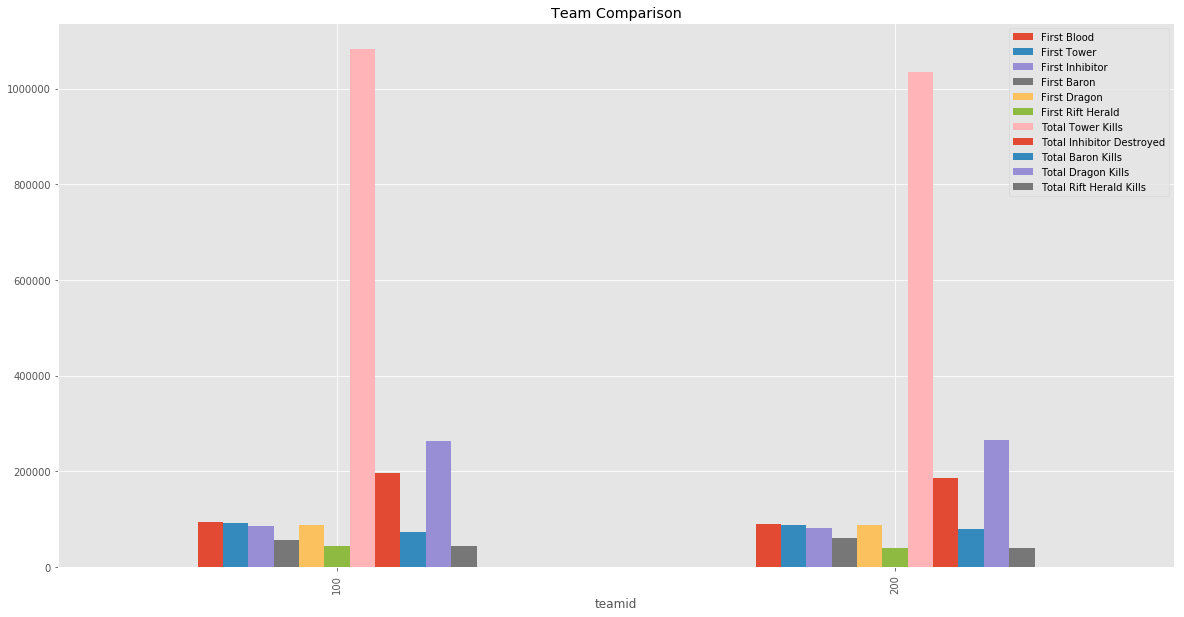

In [77]:
team_stats_total.plot.bar(figsize=(20,10))
plt.title('Team Comparison')